In [1]:
import control
import numpy as np
import scipy as sp
from scipy import signal
from matplotlib import pylab as plt
%matplotlib inline

In [2]:
def series(sys1, sys2):
    """Series connection of two systems.
    """
    if not isinstance(sys1, signal.lti):
        sys1 = signal.lti(*sys1)
    if not isinstance(sys2, signal.lti):
        sys2 = signal.lti(*sys2)
    num = np.polymul(sys1.num, sys2.num)
    den = np.polymul(sys1.den, sys2.den)
    sys = signal.lti(num, den)
    return sys
def feedback(plant, sensor=None):
    """Negative feedback connection of plant and sensor.
    If sensor is None, then it is assumed to be 1.
    """
    if not isinstance(plant, signal.lti):
        plant = signal.lti(*plant)
    if sensor is None:
        sensor = signal.lti([1], [1])
    elif not isinstance(sensor, signal.lti):
        sensor = signal.lti(*sensor)
    num = np.polymul(plant.num, sensor.den)
    den = np.polyadd(np.polymul(plant.den, sensor.den),
                     np.polymul(plant.num, sensor.num))
    sys = signal.lti(num, den)
    return sys

NameError: name 'tdete' is not defined

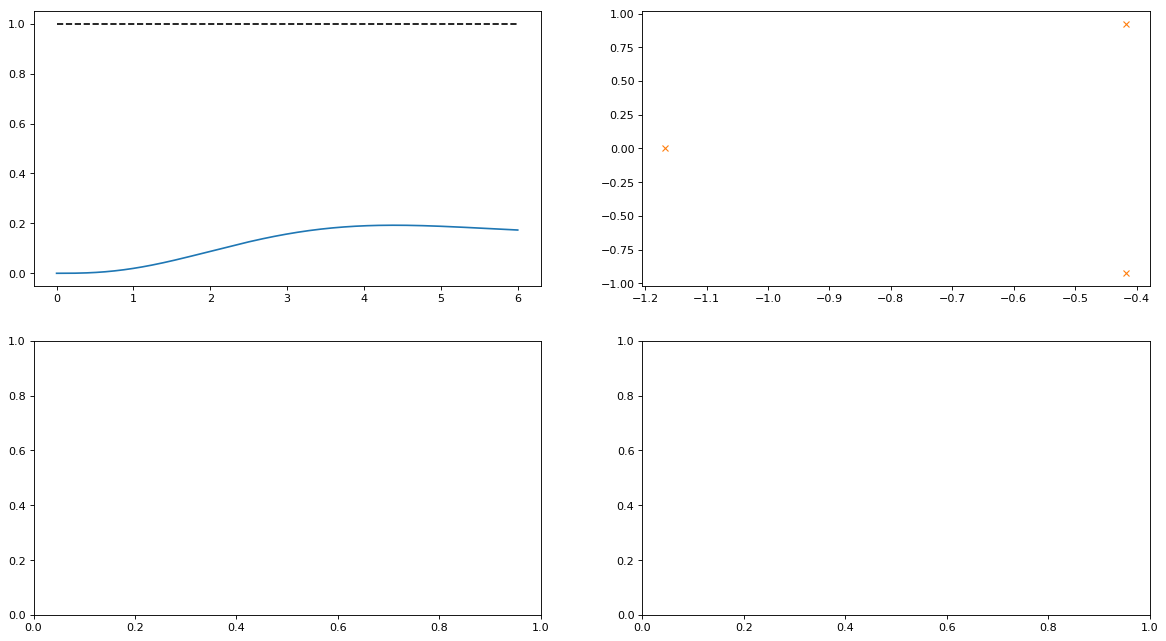

In [3]:
sys_car = signal.lti(1, [1, 1, 1])
fig, ((ax1,ax2),(ax3,ax4)) = plt.subplots(2,2,figsize=[18,10], dpi = 80, facecolor = 'w', edgecolor = 'w')
for K in [0.2, 1,2,4]:
    
    # Sistema controlador-planta
    sys_pc = series(([K], [1, 1]), sys_car)
    # Sistema realimentado
    sys_prop = feedback(sys_pc)
    # Respuesta a entrada escalón
    t = np.linspace(0, 6, num=200)
    t, y = signal.step2(sys_prop, T=t)
    ax1.plot(t, y)
    ax1.plot([0, t[-1]], [1] * 2, 'k--')
    ax2.plot(sys_prop.zeros.real,sys_prop.zeros.imag,'o')
    ax2.plot(sys_prop.poles.real,sys_prop.poles.imag,'x')
    udete = tdete**2
    res = signal.lsim(sys_prop,udete,tdete)
    ax4.plot(res[0],res[1])
ax3.plot(tdete,udete)

In [ ]:
tdete = np.linspace(0,40,1000)


In [ ]:
otrosis = signal.ZerosPolesGain([-6],[-1,-3],1)

In [ ]:
plt.plot(otrosis.zeros.real,otrosis.zeros.imag,'o')
plt.plot(otrosis.poles.real,otrosis.poles.imag,'x')

In [ ]:
sysreal = feedback(otrosis)

NameError: name 'otrosis' is not defined

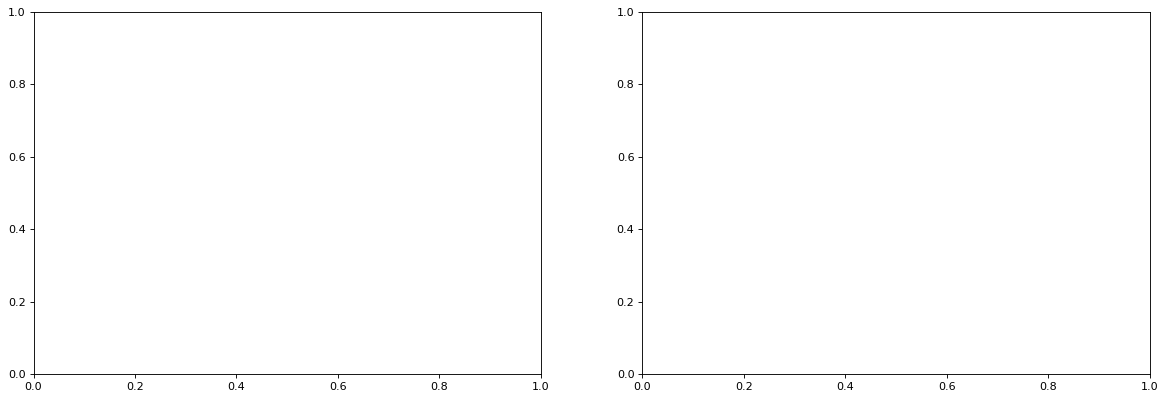

In [4]:
fig, (ax1,ax2) = plt.subplots(1,2,figsize=[18,6], dpi = 80, facecolor = 'w', edgecolor = 'w')

t = np.linspace(0, 6, num=200)
t, y = signal.step2(otrosis, T=t)
tr, yr = signal.step2(sysreal, T=t)
ax1.plot(t, y)
ax1.plot(tr,yr)
ax1.plot([0, t[-1]], [1] * 2, 'k--')

In [ ]:
plt.plot(sys_prop.zeros.real,sys_prop.zeros.imag,'o')
plt.plot(sys_prop.poles.real,sys_prop.poles.imag,'x')

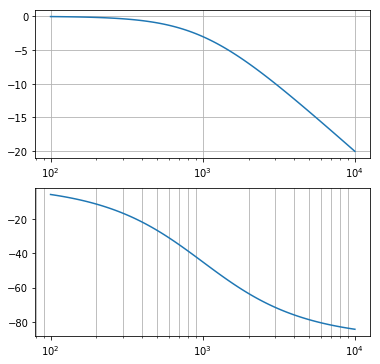

In [5]:
from scipy import signal
import matplotlib.pyplot as plt
K = 1
w0 = 1e3 # rad / s
sys1 = signal.lti([K], [1 / w0, 1]) # Creamos el sistema
w, mag, phase = signal.bode(sys1) # Diagrama de bode: frecuencias, magnitud y fase
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(6, 6))
ax1.semilogx(w, mag) # Eje x logarítmico
ax2.semilogx(w, phase) # Eje x logarítmico
ax1.grid(True,'major')
ax2.grid(True,'minor')

In [6]:
fig.show()


/usr/local/lib/python3.4/dist-packages/matplotlib/figure.py:402: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


In [7]:
print(sys1.zeros, sys1.poles, sys1.gain) # [] [-1000.] 1000.0
print(sys1.A, sys1.B, sys1.C, sys1.D) # [[-1000.]] [[ 1.]] [[ 1000.]] [ 0.]

[] [-1000.] 1000.0
[[-1000.]] [[ 1.]] [[ 1000.]] [[ 0.]]


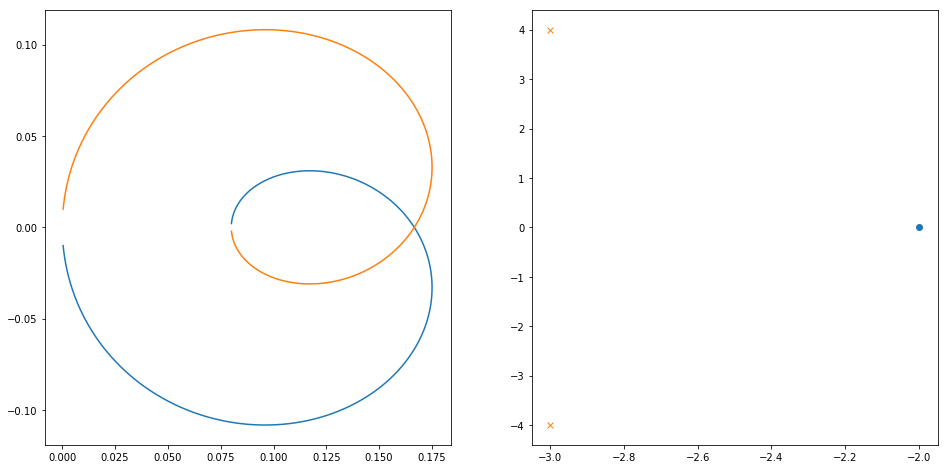

In [8]:
sys2 = signal.lti([1, 2], [1, 6, 25]) # H(s) = (s + 2) / (s ** 2 + 6 * s + 25)
w, H = signal.freqresp(sys2)
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 8))
ax1.plot(H.real, H.imag)
ax1.plot(H.real, -H.imag)
ax2.plot(sys2.zeros.real, sys2.zeros.imag, 'o')
ax2.plot(sys2.poles.real, sys2.poles.imag, 'x')

In [9]:
sysMio = signal.lti([1,2],[3,2,1])
W,H = signal.freqresp(sysMio)

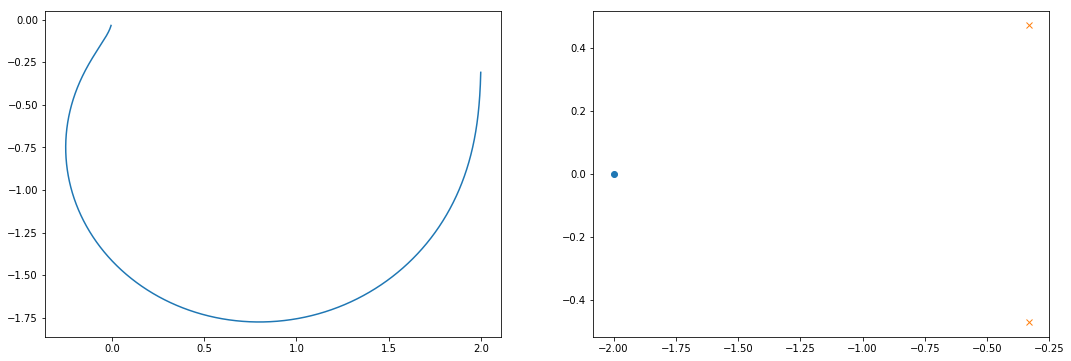

In [10]:
fig, (ax1,ax2) = plt.subplots(1,2,figsize=[18,6])
ax1.plot(H.real,H.imag)
ax2.plot(sysMio.zeros.real,sysMio.zeros.imag,'o')
ax2.plot(sysMio.poles.real,sysMio.poles.imag,'x')


In [11]:
m = 1200  # kg
b = 15  # Ns / m
sys_car = signal.lti(1, [m, b])

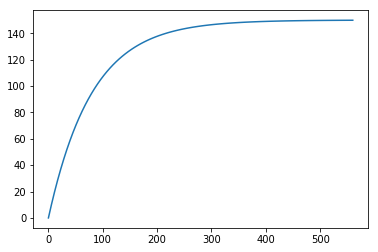

In [12]:
t,y = signal.step2(sys_car)
plt.plot(t, 2250 * y) # Equivalente a una entrada de altura 2250

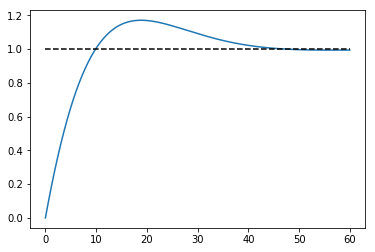

In [13]:
K_p = 200.0
K_i = 18.0
# Sistema controlador-planta
sys_pc = series(([K_p, K_i], [1, 0]), sys_car)
# Sistema realimentado
sys_prop = feedback(sys_pc)
# Respuesta a entrada escalón
t = np.linspace(0, 60, num=200)
t, y = signal.step2(sys_prop, T=t)
plt.plot(t, y)
plt.plot([0, t[-1]], [1] * 2, 'k--')

In [14]:
K_p = 700.0
K_i = 100.0
# Sistema controlador-planta
sys_pc = series(([K_p, K_i], [1, 0]), sys_car)
# Sistema realimentado
sys_prop = feedback(sys_pc)
# Respuesta a entrada escalón
t = np.linspace(0, 60, num=200)
t, y = signal.step2(sys_prop, T=t)
print("Tiempo de subida: {:.2f} s".format(tr(t, y)))
print("Máxima sobreelongación: {:.1f} %".format(Ms(y) * 100))

NameError: name 'tr' is not defined

In [15]:
def tr(t, y, ys=None, margins=(0.0, 1.0)):
    """Rise time.
    Other possible margins: (0.05, 0.95), (0.1, 0.9). If no ys is given,
    then last value of y is assumed as stationary.
    """
    if ys is None:
        ys = y[-1]
    # Values between margins[0] * ys and margins[1] * ys
    mask = (y > margins[0] * ys) &amp; (y < margins[1] * ys)
    # If response oscillates, only interested in limits of first region
    idx_change = np.nonzero(np.diff(mask))[0]
    # Initial and final indexes
    idx = idx_change[0], idx_change[1]
    # Time difference
    return t[idx[1]] - t[idx[0]]
def Ms(y, ys=None):
    """Maximum overshoot.
    Other possible margins: (0.05, 0.95), (0.1, 0.9). If no ys is given,
    then last value of y is assumed as stationary.
    """
    if ys is None:
        ys = y[-1]
    ymax = np.max(y)
    Ms = (ymax - ys) / ys
    return Ms

In [16]:
s1 = signal.ZerosPolesGain([0.5,2], [0,0,1,3], [10])
w, H = signal.freqresp(s1,w=np.ar)
                    

AttributeError: 'module' object has no attribute 'ar'

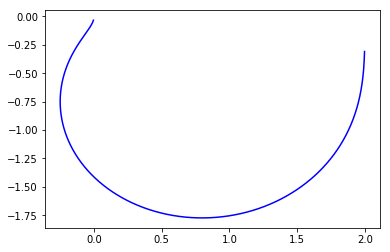

In [17]:
plt.figure()
plt.plot(H.real, H.imag, "b")
#plt.plot(H.real, -H.imag, "r")
plt.show()

In [18]:
w, H = signal.freqresp(s1

SyntaxError: unexpected EOF while parsing (<ipython-input-18-811c308801ce>, line 1)

In [19]:
plt.plt

AttributeError: 'module' object has no attribute 'plt'

In [20]:
signal.zpk2tf([],[5,3],[2])

(array([ 2.]), array([  1.,  -8.,  15.]))